In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-ai-assistant-usage-behavior-dataset/Daily_AI_Assistant_Usage_Behavior_Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/daily-ai-assistant-usage-behavior-dataset/Daily_AI_Assistant_Usage_Behavior_Dataset.csv")

## 1) EDA ##

In [4]:
df.head()

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,tokens_used
0,2025-02-20 03:29:00,Desktop,Education,14,7.08,5,GPT-5.1,44
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047
2,2025-01-12 17:56:00,Smart Speaker,Education,236,10.15,4,GPT-4o,1379
3,2025-01-04 09:11:00,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105
4,2025-02-14 19:59:00,Smart Speaker,Research,220,4.50,5,GPT-5.1,107


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               300 non-null    object 
 1   device                  300 non-null    object 
 2   usage_category          300 non-null    object 
 3   prompt_length           300 non-null    int64  
 4   session_length_minutes  300 non-null    float64
 5   satisfaction_rating     300 non-null    int64  
 6   assistant_model         300 non-null    object 
 7   tokens_used             300 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [6]:
df.describe()

,prompt_length,session_length_minutes,satisfaction_rating,tokens_used
count,300.000000,300.000000,300.000000,300.000000
mean,129.123333,7.747100,2.986667,780.536667
std,70.048011,4.325186,1.411784,428.272858
min,5.000000,0.200000,1.000000,32.000000
25%,67.750000,4.112500,2.000000,393.250000
50%,132.500000,7.690000,3.000000,797.500000
75%,187.250000,11.572500,4.000000,1143.250000
max,250.000000,14.990000,5.000000,1500.000000


In [7]:
df.isnull().sum()

timestamp                 0
device                    0
usage_category            0
prompt_length             0
session_length_minutes    0
satisfaction_rating       0
assistant_model           0
tokens_used               0
dtype: int64

In [8]:
df.shape

(300, 8)

### Convert 'timestap' column object to datetime ###

In [9]:
df['timestamp']=pd.to_datetime(df['timestamp'],errors='coerce')

In [10]:
df['Hour'] = df['timestamp'].dt.hour             
df['Date'] = df['timestamp'].dt.date             

print(df[['timestamp', 'Hour','Date']].head())
print(df.dtypes)

            timestamp  Hour        Date
0 2025-02-20 03:29:00     3  2025-02-20
1 2025-01-08 18:28:00    18  2025-01-08
2 2025-01-12 17:56:00    17  2025-01-12
3 2025-01-04 09:11:00     9  2025-01-04
4 2025-02-14 19:59:00    19  2025-02-14
timestamp                 datetime64[ns]
device                            object
usage_category                    object
prompt_length                      int64
session_length_minutes           float64
satisfaction_rating                int64
assistant_model                   object
tokens_used                        int64
Hour                               int32
Date                              object
dtype: object


In [11]:
df.head()

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,tokens_used,Hour,Date
0,2025-02-20 03:29:00,Desktop,Education,14,7.08,5,GPT-5.1,44,3,2025-02-20
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047,18,2025-01-08
2,2025-01-12 17:56:00,Smart Speaker,Education,236,10.15,4,GPT-4o,1379,17,2025-01-12
3,2025-01-04 09:11:00,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105,9,2025-01-04
4,2025-02-14 19:59:00,Smart Speaker,Research,220,4.50,5,GPT-5.1,107,19,2025-02-14


## 2)VISUALIZATION ##

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


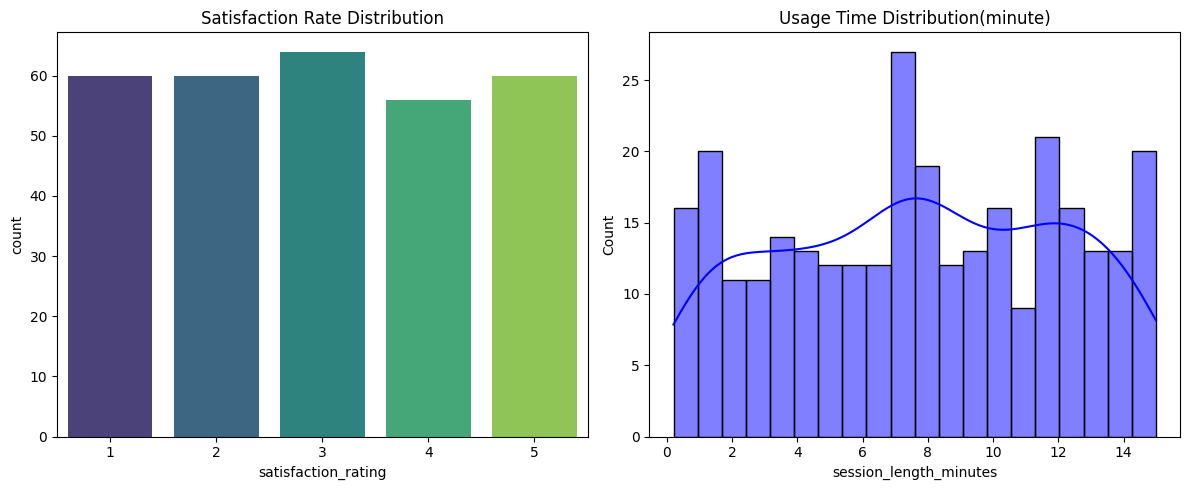

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction_rating', data=df, palette='viridis')
plt.title('Satisfaction Rate Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['session_length_minutes'], bins=20, kde=True, color='blue')
plt.title('Usage Time Distribution(minute)')

plt.tight_layout()
plt.show()

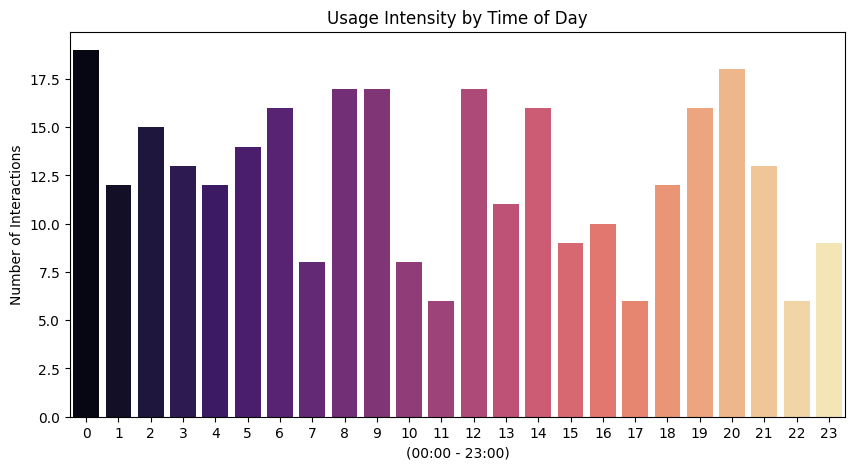

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='magma')
plt.title('Usage Intensity by Time of Day')
plt.xlabel('(00:00 - 23:00)')
plt.ylabel('Number of Interactions')
plt.show()

In [14]:
plt.figure(figsize=(12, 5)) 

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'prompt lenght')

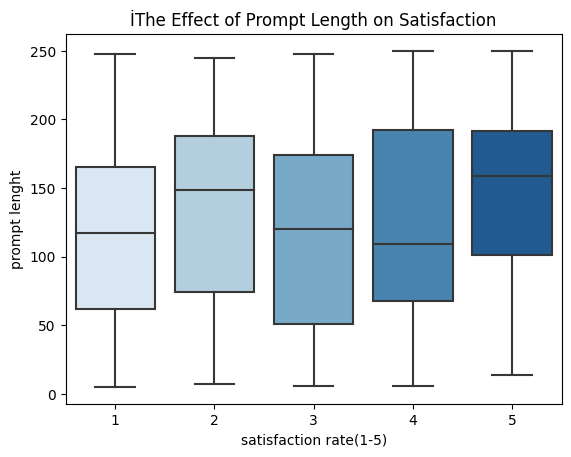

In [15]:
# 1. Prompt Length vs Satisfaction (Box Plot)
sns.boxplot(x='satisfaction_rating', y='prompt_length', data=df, palette='Blues')
plt.title('İThe Effect of Prompt Length on Satisfaction')
plt.xlabel('satisfaction rate(1-5)')
plt.ylabel('prompt lenght')

Text(0, 0.5, 'session lenght (minute)')

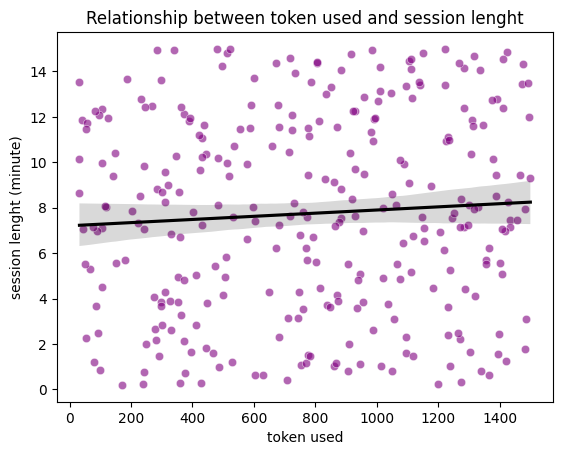

In [16]:
# 2. Tokens Used vs Duration (Scatter Plot)
sns.scatterplot(x='tokens_used', y='session_length_minutes', data=df, alpha=0.6, color='purple')
#  (Regresyon)
sns.regplot(x='tokens_used', y='session_length_minutes', data=df, scatter=False, color='black')
plt.title('Relationship between token used and session lenght')
plt.xlabel('token used')
plt.ylabel('session lenght (minute)')

Text(0, 0.5, 'Avg score')

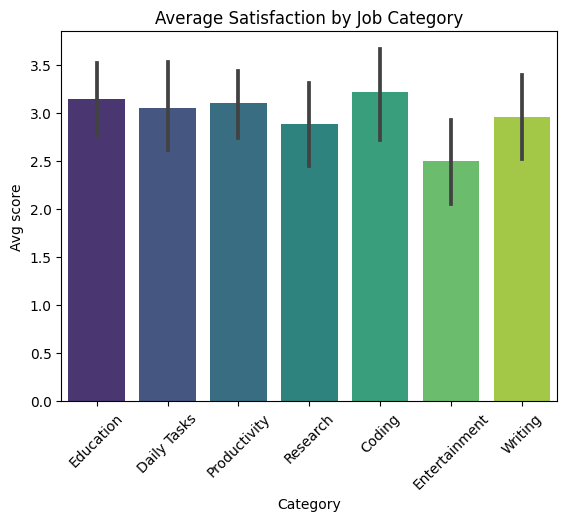

In [17]:
# 3. Usage Category vs Satisfaction (Bar Plot)
sns.barplot(x='usage_category', y='satisfaction_rating', data=df, palette='viridis')
plt.title('Average Satisfaction by Job Category')
plt.xticks(rotation=45) 
plt.xlabel('Category')
plt.ylabel('Avg score')

(1.0, 5.0)

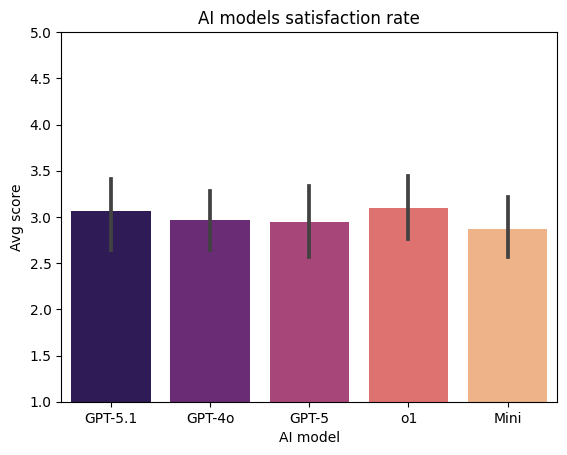

In [18]:
# 4. AI Model vs Satisfaction (Bar Plot)
sns.barplot(x='assistant_model', y='satisfaction_rating', data=df, palette='magma')
plt.title('AI models satisfaction rate')
plt.xlabel('AI model')
plt.ylabel('Avg score')
plt.ylim(1, 5)


## 3) Feature Importances With Random Forest ##

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [20]:
df_ml=df.copy()

In [21]:
# Label Encoding 
le = LabelEncoder()
categorical_cols = ['usage_category', 'assistant_model','device'] # Varsa 'Device' sütununu da ekle
for col in categorical_cols:
    if col in df_ml.columns:
        df_ml[col] = le.fit_transform(df_ml[col].astype(str))

In [22]:
y=df_ml['satisfaction_rating']
x=df_ml.drop(['satisfaction_rating','timestamp','Date'],axis=1)

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x,y)

RandomForestClassifier(random_state=42)

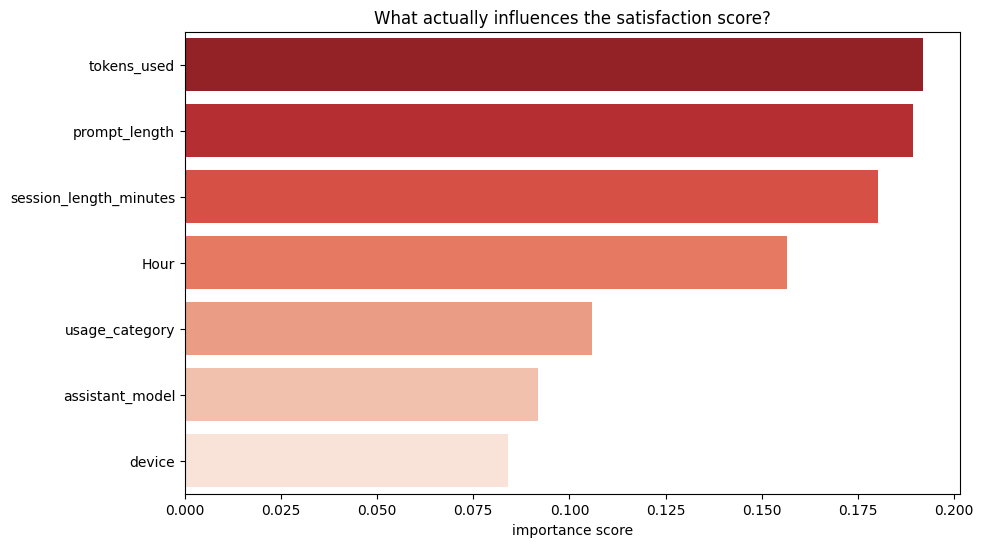

In [23]:
feature_imp = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='Reds_r')
plt.title('What actually influences the satisfaction score?')
plt.xlabel('importance score')
plt.show()

### Average Satisfaction Based on Prompt Length ###

  Prompt_Category  satisfaction_rating
0            Low              2.861386
1          Medium             2.898990
2            High             3.200000

--- Automatically selected ranges---
prompt_length
(4.999, 92.0]       101
(92.0, 166.667]      99
(166.667, 250.0]    100
Name: count, dtype: int64


/tmp/ipykernel_13/2563666375.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby('Prompt_Category')['satisfaction_rating'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


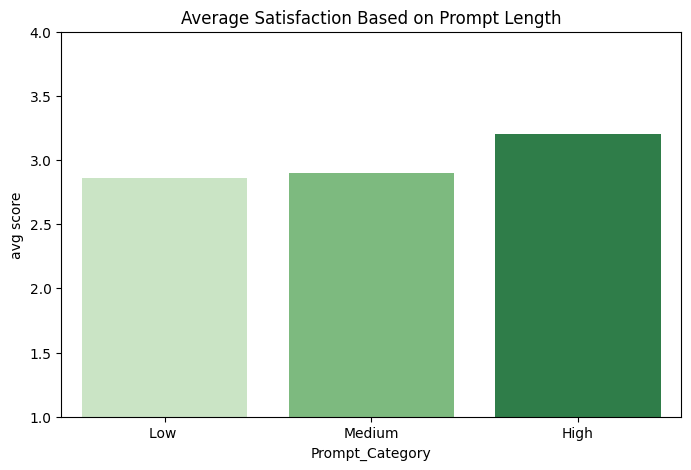

In [24]:


df['Prompt_Category'] = pd.qcut(df['prompt_length'], q=3 , labels=['Low ','Medium','High'])


# Mean satisfaction rate in every group
group_analysis = df.groupby('Prompt_Category')['satisfaction_rating'].mean().reset_index()

print(group_analysis)
print("\n--- Automatically selected ranges---")
print(pd.qcut(df['prompt_length'], q=3).value_counts().sort_index())

plt.figure(figsize=(8, 5))
sns.barplot(x='Prompt_Category', y='satisfaction_rating', data=group_analysis, palette='Greens')
plt.title('Average Satisfaction Based on Prompt Length')
plt.ylim(1, 4) 
plt.ylabel('avg score')
plt.show()

### Average Satisfaction Based on Token Used ###

  token_category  satisfaction_rating
0            Low             2.920000
1         Medium             3.138614
2           High             2.898990

--- Automatically selected ranges---
tokens_used
(31.999, 512.667]    100
(512.667, 1020.0]    101
(1020.0, 1500.0]      99
Name: count, dtype: int64


/tmp/ipykernel_13/1965602635.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  token_analysis=df.groupby('token_category')['satisfaction_rating'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


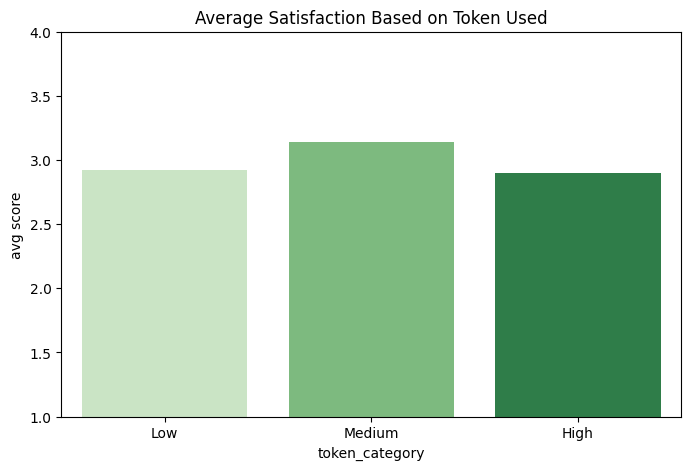

In [25]:
df['token_category']=pd.qcut(df['tokens_used'],q=3,labels=['Low','Medium','High'])

token_analysis=df.groupby('token_category')['satisfaction_rating'].mean().reset_index()
print(token_analysis)

print("\n--- Automatically selected ranges---")
print(pd.qcut(df['tokens_used'], q=3).value_counts().sort_index())

plt.figure(figsize=(8, 5))
sns.barplot(x='token_category', y='satisfaction_rating', data=token_analysis, palette='Greens')
plt.title('Average Satisfaction Based on Token Used')
plt.ylim(1, 4) 
plt.ylabel('avg score')
plt.show()